# 1. Data Preparataion

## 1-1.Data Collection & Labeling

In [297]:
import pandas as pd

# data load
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.head())

# label confirm
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# class confirm
print(y.value_counts())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
diabetes
0    91500
1     8500
Name: count, dtype: int64


## 1-2. Data Preprocessing

### 1-2-1. Data Cleaning

In [298]:
# data load
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Check the number of missing values
missing_counts = df.isnull().sum()
print("null values:")
print(missing_counts)

# 1. check the validation of 'gender'
count = df[~df['gender'].isin(['Female', 'Male'])].shape[0]
print("\n1.gender: count not valid values: ", end="")
print(count)
df = df[df['gender'].isin(['Female', 'Male'])].reset_index(drop=True)
print("Successfully ignored.")

# 2. check the validation of 'age'
count = df[(df['age'] < 0) | (df['age'] > 80)].shape[0]
print("\n2.age: count not valid values: ", end="")
print(count)

# 3. check the validation of 'hypertension'
count = df[~df['hypertension'].isin([0, 1])].shape[0]
print("\n3.hypertension: count not valid values: ", end="")
print(count)

# 4. check the validation of 'heart_disease'
count = df[~df['heart_disease'].isin([0, 1])].shape[0]
print("\n4.heart_disease: count not valid values: ", end="")
print(count)

# 5. check the validation of 'smoking_history'
valid_categories = ['not current', 'former', 'No Info', 'current', 'never', 'ever']
count_invalid = df[~df['smoking_history'].isin(valid_categories)].shape[0]
print("\n5.smoking_history: count not valid values: ", end="")
print(count_invalid)

# count 'No Info' of 'smoking_history'
no_info_count = (df['smoking_history'] == 'No Info').sum()
print("count no_info of smoking_history: ", end="")
print(no_info_count)

df = df[df['smoking_history'] != 'No Info'].reset_index(drop=True)
print("Successfully ignored.")

# 6. check the validation of 'diabetes'
count = df[~df['diabetes'].isin([0, 1])].shape[0]
print("\n6.diabetes: count not valid values: ", end="")
print(count)

print("\ncount the whole tuples: ", end="")
print(len(df))



null values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

1.gender: count not valid values: 18
Successfully ignored.

2.age: count not valid values: 0

3.hypertension: count not valid values: 0

4.heart_disease: count not valid values: 0

5.smoking_history: count not valid values: 0
count no_info of smoking_history: 35810
Successfully ignored.

6.diabetes: count not valid values: 0

count the whole tuples: 64172


In [299]:
print((df['diabetes'] == 0).sum())
print((df['diabetes'] == 1).sum())

57126
7046


### 1-2-2. Data Transformation & Discretization

In [300]:
# Data split and dealing with Imbalance
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [301]:
# Scaling
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform Test data with Train Scaler
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("=== Train Set ===")
print(X_train[numeric_features].head())
print("\n=== Test Set ===")
print(X_test[numeric_features].head())

# dealing with outliers
z_scores = np.abs(stats.zscore(X_train[numeric_features]))
outliers = (z_scores > 3).any(axis=1)

X_train = X_train[~outliers]
y_train = y_train[~outliers]

print(f"count outliers: {outliers.sum()}")
print(f"data size after eliminating outliers: {len(X_train)}")


=== Train Set ===
            age       bmi  HbA1c_level  blood_glucose_level
45951  0.641574  0.340677     0.124744            -1.416485
28255  0.385447 -0.072696     0.489883             0.124945
12809 -0.485386  2.865312     2.406862             2.377804
5814   0.487898  0.457034     0.946307            -1.297913
12382 -0.280484  0.382014     2.954571             3.326376

=== Test Set ===
            age       bmi  HbA1c_level  blood_glucose_level
34905 -0.946415 -1.032639     0.855022            -0.230770
14918  0.590349 -0.167618    -0.970673             0.433231
62814 -1.817247 -2.014016     0.946307             0.006373
35903 -1.202542 -1.118375    -1.883520            -1.416485
3904   0.590349  1.185794    -1.427096            -0.942199


count outliers: 1974
data size after eliminating outliers: 49363


In [302]:
print((y_train == 0).sum())
print((y_train == 1).sum())

45187
4176


## 1-3. Feature Engineering

In [303]:
# one-hot encoding for nominal_columns
nominal_features = ['gender','smoking_history']
X_train = pd.get_dummies(X_train, columns=nominal_features, drop_first=False)

# Transform Test data with Train Scaler
X_test = pd.get_dummies(X_test, columns=nominal_features, drop_first=False)

X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
45951,0.641574,0,1,0.340677,0.124744,-1.416485,False,True,False,False,True,False,False
28255,0.385447,0,0,-0.072696,0.489883,0.124945,False,True,False,True,False,False,False
12809,-0.485386,0,0,2.865312,2.406862,2.377804,False,True,False,False,True,False,False
5814,0.487898,0,0,0.457034,0.946307,-1.297913,False,True,False,False,False,True,False
2086,-1.407444,0,0,-0.856572,-0.514249,-0.325627,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61884,-0.690288,0,0,-0.732561,-0.514249,0.480659,True,False,False,False,False,True,False
17423,1.666083,1,0,-1.191864,-1.427096,-0.942199,True,False,False,False,False,True,False
37610,-1.151317,0,0,0.028351,0.124744,0.006373,False,True,False,False,False,True,False
54046,-1.100091,0,0,-0.293161,0.216029,-1.416485,True,False,False,True,False,False,False


In [304]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"원본 훈련 데이터 클래스 분포: \n{pd.Series(y_train).value_counts()}")
print(f"SMOTE 적용 후 훈련 데이터 클래스 분포: \n{pd.Series(y_train).value_counts()}")

원본 훈련 데이터 클래스 분포: 
diabetes
0    45187
1    45187
Name: count, dtype: int64
SMOTE 적용 후 훈련 데이터 클래스 분포: 
diabetes
0    45187
1    45187
Name: count, dtype: int64


In [305]:
# Check Importances
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
importances

# It is difficult to select a particular column of very low importance, so let's concentrate all the columns on learning.

array([0.18814491, 0.01535711, 0.00686807, 0.10955777, 0.38560383,
       0.27110813, 0.0030446 , 0.00343784, 0.00293203, 0.00262991,
       0.00417334, 0.00413477, 0.00300769])

# 2. ML Model Training

In [306]:
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier
# from sklearn.metrics import (roc_auc_score, f1_score, 
#                             precision_score, recall_score, 
#                             make_scorer)
# import numpy as np
# from sklearn.metrics import classification_report


# # Choose Metrics
# scoring = {
#     'auc_roc': make_scorer(roc_auc_score, needs_proba=True),
#     'f1': make_scorer(f1_score),
#     'precision': make_scorer(precision_score),
#     'recall': make_scorer(recall_score)
# }

# # 2. Select Model (XGBoost)
# model = XGBClassifier(
#     objective='binary:logistic',
#     scale_pos_weight=10.8,  # 91500/8500 ≈ 10.8
#     random_state=42,
#     eval_metric='logloss'
# )

# # 3. Stratified 5-Fold Cross Validation
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # 4. Validation
# cv_results = []
# for train_idx, val_idx in skf.split(X_train, y_train):
#     # split each fold
#     X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
#     X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
#     # train
#     model.fit(X_fold_train, y_fold_train)
    
#     # 예측
#     y_pred = model.predict(X_fold_val)
#     y_proba = model.predict_proba(X_fold_val)[:, 1]
    
#     # 지표 계산
#     fold_metrics = {
#         'auc_roc': roc_auc_score(y_fold_val, y_proba),
#         'f1': f1_score(y_fold_val, y_pred),
#         'precision': precision_score(y_fold_val, y_pred),
#         'recall': recall_score(y_fold_val, y_pred)
#     }
#     cv_results.append(fold_metrics)

# # 5. 교차 검증 결과 평균
# avg_metrics = {
#     'auc_roc': np.mean([m['auc_roc'] for m in cv_results]),
#     'f1': np.mean([m['f1'] for m in cv_results]),
#     'precision': np.mean([m['precision'] for m in cv_results]),
#     'recall': np.mean([m['recall'] for m in cv_results])
# }

# print("\n=== Cross Validation Results ===")
# print(f"AUC-ROC: {avg_metrics['auc_roc']:.4f}")
# print(f"F1-Score: {avg_metrics['f1']:.4f}")
# print(f"Precision: {avg_metrics['precision']:.4f}")
# print(f"Recall: {avg_metrics['recall']:.4f}")

# # 6. 최종 테스트셋 평가
# model.fit(X_train, y_train)
# y_test_pred = model.predict(X_test)
# y_test_proba = model.predict_proba(X_test)[:, 1]

# print("\n=== Test Set Performance ===")
# print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")
# print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
# print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
# print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_test_pred))


# # 4. 결과 시각화
# import matplotlib.pyplot as plt
# def visualize_results(cv_results):
#     plt.figure(figsize=(15, 6))
    
#     # 1. AUC-ROC 비교
#     test_auc = [m['test_auc_roc'] for m in cv_results]
#     train_auc = [m['train_auc_roc'] for m in cv_results]  # train_auc_roc가 없는 경우 제거
    
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1,6), test_auc, 'o-', label='Test')
#     plt.plot(range(1,6), train_auc, 's--', label='Train')  # train 데이터 결과가 없는 경우 이 라인 제거
#     plt.title('AUC-ROC Curve Comparison')
#     plt.xlabel('Fold')
#     plt.ylabel('AUC-ROC')
#     plt.legend()

# # 함수 호출 시 cv_results 전달
# visualize_results(cv_results)



In [307]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import (roc_auc_score, f1_score, 
                            precision_score, recall_score)
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# select model (XGBoost)
model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    eval_metric='logloss',
    random_state=42
)

# cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    # split
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    # train
    model.fit(X_fold_train, y_fold_train)
    
    # predict
    val_pred = model.predict(X_fold_val)
    val_proba = model.predict_proba(X_fold_val)[:, 1]
    
    # calculate
    fold_metrics = {
        'fold': fold_idx,
        'val_auc': roc_auc_score(y_fold_val, val_proba),
        'val_f1': f1_score(y_fold_val, val_pred),
        'val_precision': precision_score(y_fold_val, val_pred),
        'val_recall': recall_score(y_fold_val, val_pred)
    }
    cv_results.append(fold_metrics)

# mean results of validation
avg_metrics = {
    'val_auc': np.mean([m['val_auc'] for m in cv_results]),
    'val_f1': np.mean([m['val_f1'] for m in cv_results]),
    'val_precision': np.mean([m['val_precision'] for m in cv_results]),
    'val_recall': np.mean([m['val_recall'] for m in cv_results])
}

# print results
print("\n=== results of cross validation ===")
print(f"val AUC-ROC: {avg_metrics['val_auc']:.4f}")
print(f"val F1-Score: {avg_metrics['val_f1']:.4f}")
print(f"val Precision: {avg_metrics['val_precision']:.4f}")
print(f"val Recall: {avg_metrics['val_recall']:.4f}")

# evaluate
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("\n=== performance of test set ===")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print("\nclassification_report:")
print(classification_report(y_test, y_test_pred))


=== results of cross validation ===
val AUC-ROC: 0.9963
val F1-Score: 0.9719
val Precision: 0.9899
val Recall: 0.9545

=== performance of test set ===
AUC-ROC: 0.9736
F1-Score: 0.7946
Precision: 0.9003
Recall: 0.7111

classification_report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.90      0.71      0.79      1409

    accuracy                           0.96     12835
   macro avg       0.93      0.85      0.89     12835
weighted avg       0.96      0.96      0.96     12835



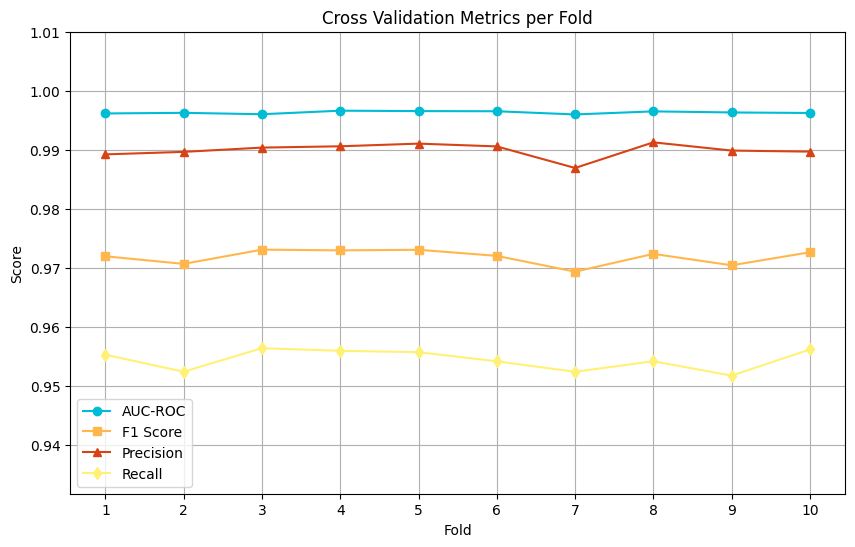

In [309]:
# visualization
def visualize_cv_metrics(cv_results):

    auc_roc = [m['val_auc'] for m in cv_results]
    f1 = [m['val_f1'] for m in cv_results]
    precision = [m['val_precision'] for m in cv_results]
    recall = [m['val_recall'] for m in cv_results]
    
    # 값의 최소치 찾기 (여백 추가)
    min_value = min(min(auc_roc), min(f1), min(precision), min(recall))
    y_min = max(0.9, min_value - 0.02)  # 최소값보다 약간 낮게 설정
    
    folds = range(1, len(cv_results) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(folds, auc_roc, marker='o', label='AUC-ROC', color='#00bcd4')
    plt.plot(folds, f1, marker='s', label='F1 Score', color='#ffb74d')
    plt.plot(folds, precision, marker='^', label='Precision', color='#d84315')
    plt.plot(folds, recall, marker='d', label='Recall', color='#fff176')
    plt.title('Cross Validation Metrics per Fold')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(y_min, 1.01)  # y축 범위를 0.9~1.01로 조정
    plt.xticks(folds)
    plt.legend()
    plt.grid(True)
    plt.show()

# 사용 예시
visualize_cv_metrics(cv_results)
